In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sb_utils import save_file

In [2]:
cust_data = pd.read_csv('/Users/sweathanjasty/Desktop/Springboard/data/churners_cleaned.csv')

In [3]:
round(cust_data.describe(), 2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,3.690378e+07,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,7.130368e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,7.179264e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,7.731435e+08,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


([<matplotlib.patches.Wedge at 0x7fa6260f45b0>,
 [Text(-0.9628371444551311, 0.5319254019667504, 'Attrited Customer'),
  Text(0.9628371693563555, -0.5319253568930898, 'Existing Customers')],
 [Text(-0.525183896975526, 0.29014112834550015, '83.93%'),
  Text(0.5251839105580121, -0.2901411037598671, '16.07%')])

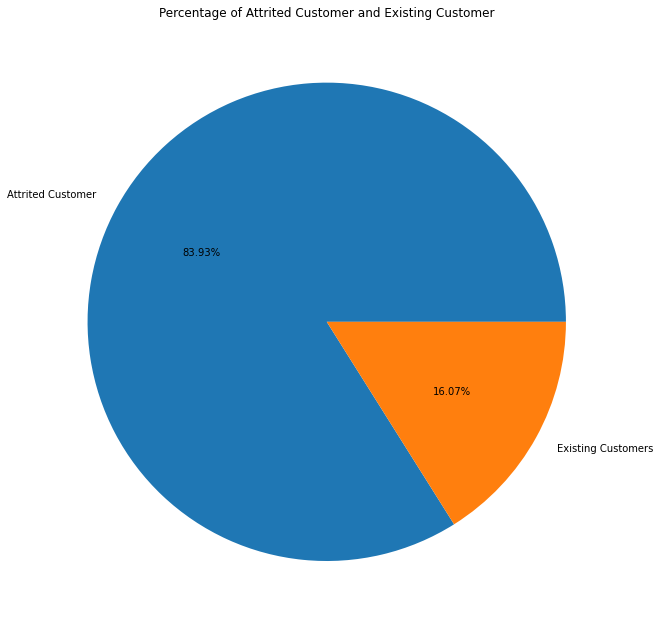

In [4]:
##Percentage of Attrited Customer and Existing Customer

count=pd.value_counts(cust_data['Attrition_Flag']).tolist()
plt.figure(figsize=(11,11))
plt.title("Percentage of Attrited Customer and Existing Customer")
plt.pie(x=count,labels=["Attrited Customer","Existing Customers"],autopct='%.2f%%')

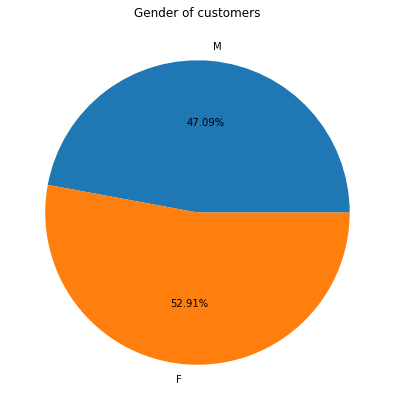

In [6]:
#Gender of Customers

fig, ax = plt.subplots(figsize=(7, 7))
count = Counter(cust_data['Gender'])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Gender of customers')
plt.show()

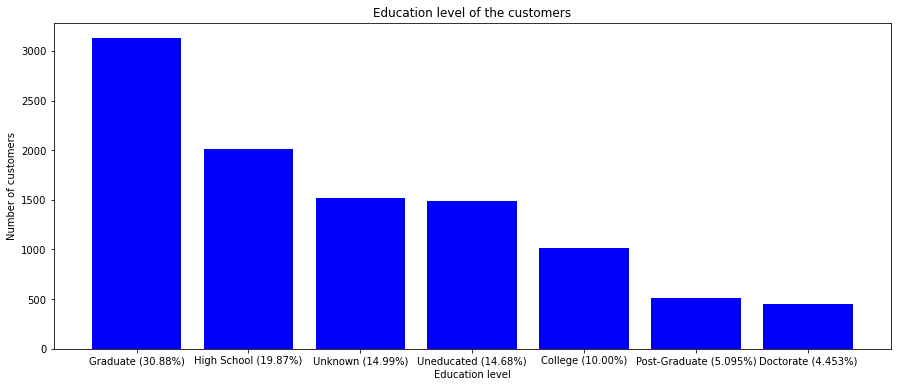

In [8]:
#Education Level of the customers

fig, ax = plt.subplots(figsize=(15, 6))
count = Counter(cust_data['Education_Level'])
count = pd.Series(count).sort_values(ascending=False)
labels = []

for i in count.keys():
    labels.append(i + ' (' + str(count[i]/len(cust_data['Education_Level'])*100)[:5] + '%)')

plt.bar(labels, count, color='blue')
plt.title('Education level of the customers')
plt.xlabel('Education level')
plt.ylabel('Number of customers')
plt.show()

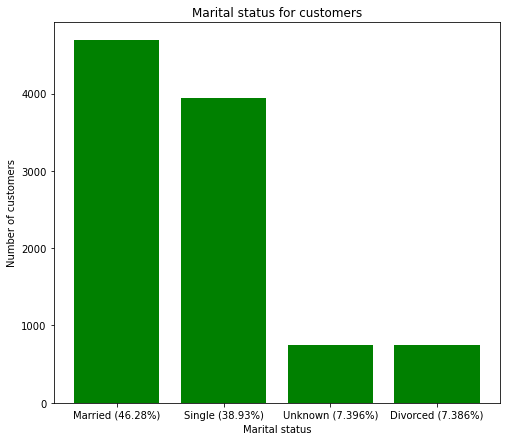

In [9]:
##Marital status of customers

fig, ax = plt.subplots(figsize=(8, 7))
count = Counter(cust_data['Marital_Status'])
labels = []

for i in count:
    labels.append(i + ' (' + str(count[i]/len(cust_data['Marital_Status'])*100)[:5] + '%)')
    
plt.bar(labels, count.values(), color='green')
plt.title('Marital status for customers')
plt.ylabel('Number of customers')
plt.xlabel('Marital status')
plt.show()

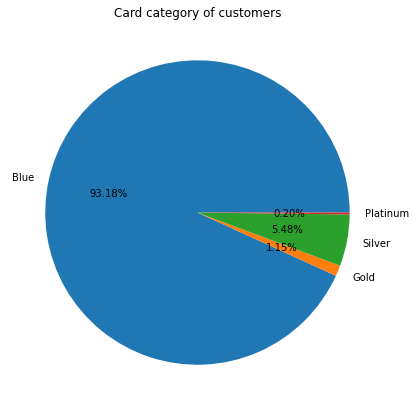

In [10]:
#Card Category of Customers

fig, ax = plt.subplots(figsize=(7, 7))
count = Counter(cust_data['Card_Category'])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Card category of customers')
plt.show()

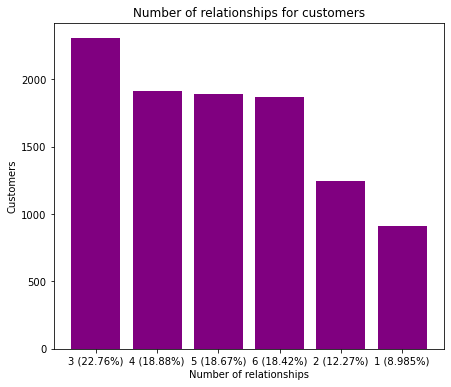

In [11]:
# Number of relationships for customers

fig, ax = plt.subplots(figsize=(7, 6))
count = Counter(cust_data['Total_Relationship_Count'])
count = pd.Series(count).sort_values(ascending=False)
labels = []

for i in count.keys():
    labels.append(str(i) + ' (' + str(count[i]/len(cust_data['Total_Relationship_Count'])*100)[:5] + '%)')
    
plt.bar(labels, count, color='purple')
plt.title('Number of relationships for customers')
plt.ylabel('Customers')
plt.xlabel('Number of relationships')
plt.show()

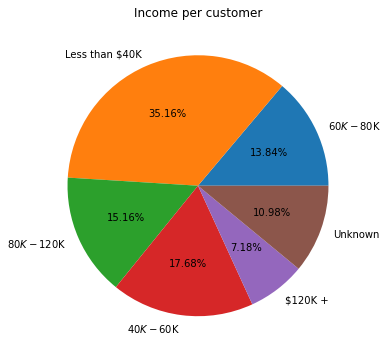

In [12]:
# Income category of customers

fig, ax = plt.subplots(figsize=(8, 6))
count = Counter(cust_data['Income_Category'])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Income per customer')
plt.show()

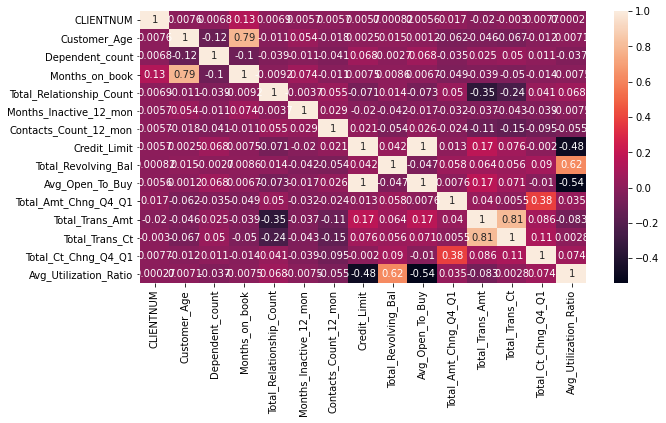

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cust_data.corr(), annot=True)
plt.show()